# **Load Dataset**

In [ ]:
# !wget --no-check-certificate "https://drive.google.com/uc?export=download&id=1XxuP8A3hKf2Nt6dtPny-j9w_cmcyRTSZ" -O dataset.zip
# !unzip dataset.zip -d dataset

--2024-11-24 07:48:52--  https://drive.google.com/uc?export=download&id=1XxuP8A3hKf2Nt6dtPny-j9w_cmcyRTSZ
Resolving drive.google.com (drive.google.com)... 172.253.115.100, 172.253.115.139, 172.253.115.102, ...
Connecting to drive.google.com (drive.google.com)|172.253.115.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1XxuP8A3hKf2Nt6dtPny-j9w_cmcyRTSZ&export=download [following]
--2024-11-24 07:48:52--  https://drive.usercontent.google.com/download?id=1XxuP8A3hKf2Nt6dtPny-j9w_cmcyRTSZ&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.179.132, 2607:f8b0:4004:c1f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.179.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10092111 (9.6M) [application/octet-stream]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>]   9.62M  20.6

In [2]:
!kaggle datasets download -d pradwitanasha/dataset-jpeg-trial-food-ingredients

Dataset URL: https://www.kaggle.com/datasets/pradwitanasha/dataset-jpeg-trial-food-ingredients
License(s): apache-2.0
 81% 57.0M/70.2M [00:00<00:00, 146MB/s]
100% 70.2M/70.2M [00:00<00:00, 151MB/s]


In [3]:
!unzip dataset-jpeg-trial-food-ingredients.zip -d dataset

Archive:  dataset-jpeg-trial-food-ingredients.zip
  inflating: dataset/Ayam/1136937_81968550-1b54-4908-a3e3-5ab4f1099926_1161_1161.jpeg  
  inflating: dataset/Ayam/1167245_720.jpeg  
  inflating: dataset/Ayam/18GPy1vDSG1Q.jpeg  
  inflating: dataset/Ayam/201711281942253_b.jpeg  
  inflating: dataset/Ayam/2022-01-08-jangan-pernah-cuci-ayam-mentah-sebelum-dimasak.jpeg  
  inflating: dataset/Ayam/2690456462.jpeg  
  inflating: dataset/Ayam/2884058488.jpeg  
  inflating: dataset/Ayam/2e91101f90ada67e5c14dd9e210e9995.jpeg  
  inflating: dataset/Ayam/31156333303-5-penyakit-yang-bisa-muncul-ketika-kita-makan-ayam-mentah-pzkgfdnpcu.jpeg  
  inflating: dataset/Ayam/415e39c5-1927-42b5-ae6e-6134e4aa074e_169.jpeg  
  inflating: dataset/Ayam/49761ab0-08b4-4b1c-92fb-9e33011c0664_169.jpeg  
  inflating: dataset/Ayam/56e383c9-2316-46c4-929e-478a11d1b649.jpeg  
  inflating: dataset/Ayam/57032bc6-f321-4e32-bb5a-219e54cdc6b1.jpeg  
  inflating: dataset/Ayam/59905f4021cde763f60360f1bae5dea3-1024x723.jpeg 

In [4]:
Data_Dir = './dataset'

In [5]:
!pip install ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.3/887.3 kB 13.9 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
model = YOLO('yolov8n.pt')  # Replace 'yolov8n.pt' with your desired model

100%|██████████| 6.25M/6.25M [00:00<00:00, 75.7MB/s]


# **Import Library**

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt

# **Split Train Val Dataset**

In [8]:
def train_val_datasets():

    training_dataset, validation_dataset = tf.keras.utils.image_dataset_from_directory(
        directory=Data_Dir,
        image_size=(120,120),
        batch_size=10,
        validation_split=0.2,
        subset="both",
        seed=42
    )
    return training_dataset, validation_dataset

In [9]:
training_dataset, validation_dataset = train_val_datasets()

Found 690 files belonging to 8 classes.
Using 552 files for training.
Using 138 files for validation.


In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt
from ultralytics import YOLO
import numpy as np # Make sure numpy is imported
import cv2

def train_val_datasets():
    training_dataset, validation_dataset = tf.keras.utils.image_dataset_from_directory(
        directory=Data_Dir,  # Make sure Data_Dir is correctly defined
        image_size=(150,150),
        batch_size=10,
        validation_split=0.2,
        subset="both",
        seed=42
    )
    return training_dataset, validation_dataset

# Load the YOLO model
model = YOLO("yolov8n.pt")  # or your desired model path

# Get the training and validation datasets
training_dataset, validation_dataset = train_val_datasets()

# Iterate through the training dataset and make predictions
for images, labels in training_dataset:
    # Convert the TensorFlow tensor to a NumPy array and ensure it's in the correct format
    images_np = images.numpy()

    # Iterate over each image in the batch
    for img in images_np:
        # Convert the image to uint8 (expected by OpenCV)
        img = cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_RGB2BGR)

        # Perform inference on individual images
        results = model(img)
        # Process the results, e.g., display them or store them
        for result in results:
            result.save()  # Or result.print(), result.save(), etc.

# Similarly, iterate through the validation dataset
for images, labels in validation_dataset:
    # Convert the TensorFlow tensor to a NumPy array and ensure it's in the correct format
    images_np = images.numpy()

    # Iterate over each image in the batch
    for img in images_np:
        # Convert the image to uint8 (expected by OpenCV)
        img = cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_RGB2BGR)

        # Perform inference on individual images
        results = model(img)
        # Process the results
        for result in results:
            result.save()  # Or result.print(), result.save(), etc.

Found 690 files belonging to 8 classes.
Using 552 files for training.
Using 138 files for validation.

0: 640x640 1 vase, 369.4ms
Speed: 6.9ms preprocess, 369.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 bowl, 1 broccoli, 383.2ms
Speed: 5.1ms preprocess, 383.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 350.8ms
Speed: 4.4ms preprocess, 350.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 donuts, 354.5ms
Speed: 4.2ms preprocess, 354.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 sandwich, 1 cake, 373.1ms
Speed: 4.6ms preprocess, 373.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 oranges, 373.3ms
Speed: 4.6ms preprocess, 373.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 395.3ms
Speed: 4.4ms preprocess, 395.3ms inference, 2.0ms postprocess per image a

# **Augmentation Model**

In [37]:
augmentation_model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.3),
    tf.keras.layers.RandomZoom(0.3),
    tf.keras.layers.RandomTranslation(0.3, 0.3),
])

augmented_train_dataset = training_dataset.map(
    lambda x, y: (augmentation_model(x, training=True), y)
)

# **CNN Model**

In [38]:
model = tf.keras.models.Sequential([
		tf.keras.Input(shape=(150,150,3)),
        augmentation_model,
        tf.keras.layers.Rescaling(1./255),

        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),

        # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        # tf.keras.layers.BatchNormalization(),
        # tf.keras.layers.MaxPooling2D(2,2),

        # tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
        # tf.keras.layers.BatchNormalization(),
        # tf.keras.layers.MaxPooling2D(2,2),

        # tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
        # tf.keras.layers.BatchNormalization(),
        # tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(len(training_dataset.class_names), activation='softmax'),
    ])

model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss="sparse_categorical_crossentropy",
        metrics=['accuracy']
    )

model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_21 (Sequential)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_22 (Rescaling)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_73 (Conv2D)                   │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_73               │ (None, 148, 148, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_73 (MaxPooling2D)      │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_19          │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 512)                 │          33,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 8)                   │           4,104 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,432 (154.03 KB)

 Trainable params: 39,304 (153.53 KB)

 Non-trainable params: 128 (512.00 B)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling, BatchNormalization, GlobalAveragePooling2D

model = Sequential([
    Rescaling(1./255, input_shape=(150, 150, 3)),

    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),  # Tambahkan Batch Normalization
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    GlobalAveragePooling2D(),  # Gantikan Flatten dengan Global Average Pooling
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(training_dataset.class_names), activation='softmax')
    ])

model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss="sparse_categorical_crossentropy",
        metrics=['accuracy']
    )

In [45]:
history = model.fit(
	training_dataset,
	epochs=100,
	validation_data=validation_dataset,
)

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 46s 749ms/step - accuracy: 0.3079 - loss: 2.0436 - val_accuracy: 0.2101 - val_loss: 2.1107
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 82s 761ms/step - accuracy: 0.3983 - loss: 1.5921 - val_accuracy: 0.1812 - val_loss: 2.4832
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 82s 767ms/step - accuracy: 0.4946 - loss: 1.3183 - val_accuracy: 0.2101 - val_loss: 2.6029
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 759ms/step - accuracy: 0.4666 - loss: 1.4595 - val_accuracy: 0.2536 - val_loss: 2.7037
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 81s 749ms/step - accuracy: 0.4767 - loss: 1.4125 - val_accuracy: 0.3261 - val_loss: 1.9325
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 742ms/step - accuracy: 0.5184 - loss: 1.2958 - val_accuracy: 0.2899 - val_loss: 1.9087
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 82s 739ms/step - accuracy: 0.5206 - loss: 1.3386 - val_accuracy: 0.3913 - val_loss: 1.5384
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 82s 737ms/step - accuracy: 0.6044 - loss: 1.1946 - 

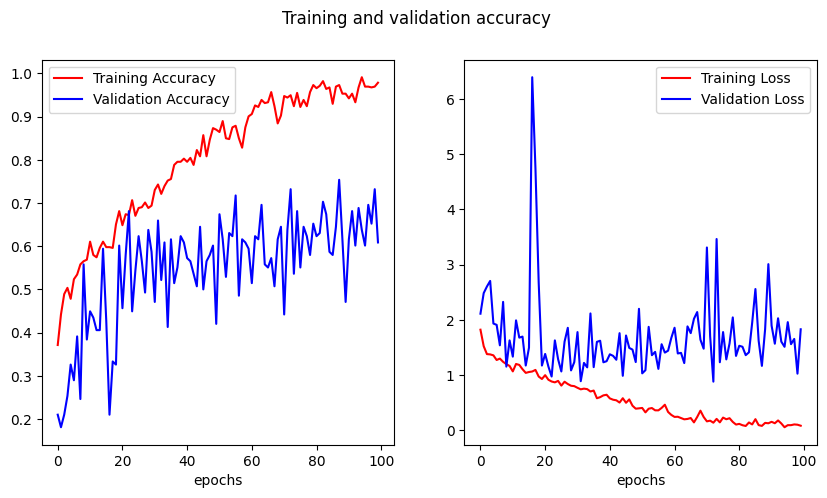

In [46]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()